#### California Housing Regression Neural Network

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
housing = fetch_california_housing()

This is a bunch object which is a special sklearn object
It behaves like a dictionary (housing['data'], housing['target']).

Contains multiple attributes:

housing.data → The actual housing feature data (NumPy array).

housing.target → The target values (median house price).

housing.feature_names → The names of each feature.

housing.DESCR → Description of the dataset.

In [9]:
# train test split of housing data which is a numpy array
X_train_full, X_test, y_train_full, y_test= train_test_split(housing.data, housing.target, test_size=0.25, random_state= 42)

# make a validation set for the compiling
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [10]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

#### Creating the Sequential Model

In [11]:
# create a model 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [12]:
# compile
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

In [13]:
# fit the model save as history
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6934 - val_loss: 0.5099
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4431 - val_loss: 0.4627
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4253 - val_loss: 0.5128
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4605 - val_loss: 0.6209
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6051 - val_loss: 0.4936
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4274 - val_loss: 0.4637
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4101 - val_loss: 0.4414
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3894 - val_loss: 0.4322
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3835 - val_loss: 0.4377
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3776 - val_loss: 0.4274

In [14]:
import matplotlib.pyplot as plt

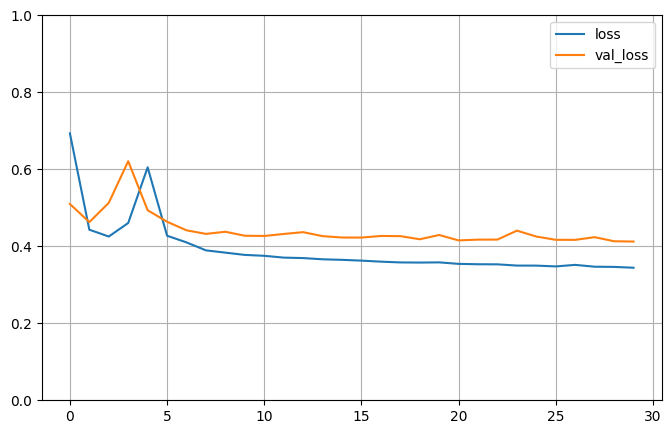

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
# make fake new houses
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 76ms/step


In [17]:
y_pred

array([[0.6190179],
       [1.7084866],
       [3.0323572]], dtype=float32)

In [18]:
# compare them
y_test[:3]

array([0.477  , 0.458  , 5.00001])

#### Nonsequential Network

One example is when the input layer connects all or part of the inputs directly to the output layer so that the neural network can learn both deep patterns and simple patterns. This is because the deep patterns are learned going the sequential route and the simple patterns are caught by jumping to the output layer.

In [36]:
# nonsequential build
input_ = keras.layers.Input(shape = X_train.shape[1:])
# pass the input to this hidden layer with 30 neurons
hidden_1 = keras.layers.Dense(30, activation='relu')(input_)
# pass the output from the first hidden layer to this hidden layer
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
# concatenate the input and the ouput of the second hidden layer
concat = keras.layers.Concatenate()([input_, hidden_2])
# pass in the result of the concatenation to this output layer
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [37]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 30)           930         ['dense_7[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_8[0][0]']          

In [38]:
# compile this model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [39]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1412 - val_loss: 1.5670
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9188 - val_loss: 0.7416
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6418 - val_loss: 0.6481
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6025 - val_loss: 0.6264
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5751 - val_loss: 0.6091
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5519 - val_loss: 0.5919
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5328 - val_loss: 0.5672
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5160 - val_loss: 0.5500
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5007 - val_loss: 0.5406
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4882 - val_loss: 0.5233

In [41]:
# mse on testing
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 961us/step - loss: 0.4903


0.4903166592121124

In [42]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 128ms/step


array([[0.56534386],
       [1.7663002 ],
       [2.8565946 ]], dtype=float32)

#### Subsetting the Wide and Deep Paths

We can send some data only through the wide path for the simple relationships and then send a different subset through the deep path to learn the more complex relationships. Often times we may want the features to overlap.

In [43]:
# subsetting the deep and wide paths

# create input A for the wide path (wont go through all layers)
# takes shape = [5] for 5 features
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
# create input B which goes the deep path and has 6 features
input_B = keras.layers.Input(shape = [6], name = 'deep_input')
hidden_1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
# concatenate layer takes the wide path and output from deep path
concat = keras.layers.Concatenate()([input_A, hidden_2])
# single output for house price
output = keras.layers.Dense(1, name = 'ouput')(concat)

# make the model
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

When we compile this model it is the same process but when we fit it we have to fit it to the two subsets. This means we first need to make the two subsets. We will also need to make the "new" data which is just the first three rows of the data that have already been reshaped.

Input A uses the first 5 features and Input B uses the last 6 so there is some overlap here. Both subsets will use features 2, 3, 4 and 5. 

In [44]:
# create the X train and valid sets for each subset
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]

# create validation for each 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

# create the correct test data
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]


# this is for making the predictions later
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [45]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

Below we show both ways to call model.fit with multiple inputs. We can pass them as a dictionary or a tuple.

In [46]:
history = model.fit({'wide_input': X_train_A, 'deep_input': X_train_B}, y_train, epochs = 20,
                     validation_data = ({'wide_input': X_valid_A, 'deep_input': X_valid_B}, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1374 - val_loss: 0.8561
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8008 - val_loss: 0.7111
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7005 - val_loss: 0.6522
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6532 - val_loss: 0.6202
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6207 - val_loss: 0.5972
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5954 - val_loss: 0.5772
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5738 - val_loss: 0.5603
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5550 - val_loss: 0.5471
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5386 - val_loss: 0.5345
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5238 - val_loss: 0.5230

In [28]:
# create the history 
history = model.fit((X_train_A, X_train_B), y_train, epochs = 30,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.0847 - val_loss: 0.8919
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7489 - val_loss: 0.6893
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6556 - val_loss: 0.6444
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6142 - val_loss: 0.6057
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5821 - val_loss: 0.5811
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5545 - val_loss: 0.5594
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - val_loss: 0.5431
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5116 - val_loss: 0.5289
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4958 - val_loss: 0.5196
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4831 - val_loss: 0.5101

In [29]:
# testing data
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4818


As is often the case, the testing data performs slightly worse than the validation data but not by much so it is not overfitting. 

In [30]:
mse_test

0.48181331157684326

In [35]:
# make predictions
model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 20ms/step


array([[0.6114548],
       [1.9770505],
       [2.761712 ]], dtype=float32)

#### Multiple Outputs

Sometimes we may have to take multiple inputs. If we are trying to locate and classify the main object in a picture it is a regression task to find the coordinates of the objects center along with the width and height, and a classification task.

We can also have a single neural network responsible for many different individual tasks such as a multiclass classification network where output 1 determines the center of an image and output 2 determines the facial expression.

We can also add an auxilary output as a regularization technique. This will avoid the concatenation which makes the model learn from the neural network without being put in a layer wiht the inputs at the end (pg. 312)

In [56]:
# adding auxilary output
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')

# input_B goes deep
hidden_1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)

# input A jumps here
concat = keras.layers.concatenate([input_A, hidden_2])
# main output is deep and wide inputs
output = keras.layers.Dense(1, name = 'main_output')(concat)

# splits away from concat layer after the hidden layer 2
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden_2)

# create model with two inputs and two outputs
model = keras.models.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

Each output is added up with their own loss function at the end of training. Since the auxilary output is just used for regularization we want to set wieghts to these different losses which is possible.

In [57]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-3), loss = ['mse', 'mse'], loss_weights=[0.9, 0.1])

Below I used both the dictionary naming convention when fitting the model and also the list convention. Your choice.

In [58]:
history = model.fit(
    [X_train_A, X_train_B], 
    [y_train, y_train],
    epochs=20, 
    validation_data=(
    [X_valid_A, X_valid_B], 
    [y_valid, y_valid]
)

)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6664 - main_output_loss: 2.4374 - aux_output_loss: 4.7277 - val_loss: 1.2146 - val_main_output_loss: 0.9676 - val_aux_output_loss: 3.4375
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0694 - main_output_loss: 0.8727 - aux_output_loss: 2.8395 - val_loss: 0.8960 - val_main_output_loss: 0.7520 - val_aux_output_loss: 2.1912
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8668 - main_output_loss: 0.7435 - aux_output_loss: 1.9759 - val_loss: 0.7884 - val_main_output_loss: 0.6887 - val_aux_output_loss: 1.6853
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7789 - main_output_loss: 0.6857 - aux_output_loss: 1.6170 - val_loss: 0.7328 - val_main_output_loss: 0.6492 - val_aux_output_loss: 1.4855
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7294 - main_output_loss: 0.6481 - aux_output_loss: 1.4613 - val_loss

In [ ]:
# since we didnt restart the model this is actually going til the 50th epoch
history = model.fit(
    {'wide_input': X_train_A, 'deep_input': X_train_B}, 
    {'main_output': y_train, 'aux_output': y_train},
    epochs=30, 
    validation_data=(
        {'wide_input': X_valid_A, 'deep_input': X_valid_B}, 
        {'main_output': y_valid, 'aux_output': y_valid}
    )
)


Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.5265 - main_output_loss: 0.4702 - aux_output_loss: 1.0337 - val_loss: 0.5601 - val_main_output_loss: 0.5045 - val_aux_output_loss: 1.0604
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5210 - main_output_loss: 0.4659 - aux_output_loss: 1.0168 - val_loss: 0.5565 - val_main_output_loss: 0.5023 - val_aux_output_loss: 1.0445
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - main_output_loss: 0.4620 - aux_output_loss: 1.0003 - val_loss: 0.5529 - val_main_output_loss: 0.5000 - val_aux_output_loss: 1.0289
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5112 - main_output_loss: 0.4587 - aux_output_loss: 0.9844 - val_loss: 0.5471 - val_main_output_loss: 0.4953 - val_aux_output_loss: 1.0128
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5068 - main_output_loss: 0.4555 - aux_output_loss: 0.9684 - val_loss

In [61]:
# we have two losses now
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.5177 - main_output_loss: 0.4908 - aux_output_loss: 0.7599


In [62]:
total_loss

0.5177099108695984

In [63]:
main_loss

0.4907994568347931

In [64]:
aux_loss

0.7599028944969177

In [65]:
# now have two predictions
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 72ms/step


In [66]:
y_pred_aux

array([[1.0599136],
       [1.700481 ],
       [2.0774426]], dtype=float32)

In [67]:
y_pred_main

array([[0.67476404],
       [2.0080202 ],
       [2.7493432 ]], dtype=float32)

#### OOP Model Set-Up

In this set up we use super() since it is a subclass of keras.models.Model so it inherits things like .fit(), .evaluate()...In the initialization we create our layers and in the call function we create the computations. This is very similar to the forward pass we did in the micrograd implementation. The method must be called call.

**when using this technique, the dictionary naming of inputs and outputs does not work, use a tuple.**

This added flexiblility includes putting for loops or other operations in the call method but we cannot save or clone it and the summary() method only shows the list of layers so stick to functional if you can.

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        # keras has an output attribute so rename main_output
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [71]:
# compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss = ['mse', 'mse'], loss_weights=[0.9, 0.1])


history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0047 - output_1_loss: 1.8954 - output_2_loss: 2.9883 - val_loss: 1.0551 - val_output_1_loss: 0.9474 - val_output_2_loss: 2.0241
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8979 - output_1_loss: 0.7998 - output_2_loss: 1.7806 - val_loss: 0.7942 - val_output_1_loss: 0.7163 - val_output_2_loss: 1.4956
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7122 - output_1_loss: 0.6397 - output_2_loss: 1.3643 - val_loss: 0.7286 - val_output_1_loss: 0.6697 - val_output_2_loss: 1.2590
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6511 - output_1_loss: 0.5917 - output_2_loss: 1.1852 - val_loss: 0.6821 - val_output_1_loss: 0.6291 - val_output_2_loss: 1.1595
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6111 - output_1_loss: 0.5574 - output_2_loss: 1.0941 - val_loss: 0.6496 - val_output_1_loss: 0.5995 - val_ou

#### Saving and Restoring

Remember this only works with the sequential or functional API.

In [73]:
# make a sequential model to be saved

# when using input_shape batch size comes first so we start at 1
# same as input_shape = [8] because X_train has 8 features
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer = keras.optimizers.SGD(1e-3), loss = 'mse')
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7118 - val_loss: 0.8984
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7521 - val_loss: 0.6765
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6540 - val_loss: 0.6435
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6215 - val_loss: 0.6238
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5979 - val_loss: 0.6033
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5773 - val_loss: 0.5860
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5594 - val_loss: 0.5697
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5435 - val_loss: 0.5611
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5283 - val_loss: 0.5458
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5153 - val_loss: 0.5362

In [74]:
model.save("my_keras_model.h5")

In [76]:
# reload the model
model = keras.models.load_model("my_keras_model.h5")

In [77]:
# make predictions from saved model
model.predict(X_new)

1/1 [==============================] - 0s 212ms/step


array([[0.95043904],
       [1.4848106 ],
       [2.608714  ]], dtype=float32)

#### Callbacks

Often times training can last a long time so we should not only save the model at the end of training but also save checkpoints at regular intervals during training just incase the computer crashes. We should also tell the fit() method to save checkpoints. This is done using callbacks. 

In [ ]:
# create callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

# this model will be saved at the end of each epoch
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4385
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4353
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4297
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4246
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4227
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4206
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4185
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4168


To prevent training for too long and overfitting we can use early stopping. This is done with save_best_only = True. The model will still train for all epochs but not every epoch will be saved (unless it gets better each time).

In [79]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)

# fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4150 - val_loss: 0.4596
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4136 - val_loss: 0.4583
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4119 - val_loss: 0.4570
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4102 - val_loss: 0.4567
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4091 - val_loss: 0.4552
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4076 - val_loss: 0.4536
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4061 - val_loss: 0.4535
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4050 - val_loss: 0.4508
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4035 - val_loss: 0.4516
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4023 - val_loss: 0.4500

In [80]:
# load best model
model = keras.models.load_model('my_keras_model.h5')

This can be combined with the early stopping callback which interrupts training when it measures no progress on the validation data after a certain number of "patience" rounds. When we say patience = 5 it will go for 5 more epochs to check for an improvement. The restore best weights argument means after those 5 that did not improve we will go back to the one where it was improving.

The following code combines both callbacks. Early stopping is used so that we do not train for 100 epochs if we do not have to and the old callback saves the best model. We did 56 epochs instead of 100 since we used early stopping. It is important to know that since we used save_best_only = True, the last epoch may not be the one that gets saved. This is because we do 5 patience rounds so the old callback already saved that model before training did not improve.

In [81]:
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.4420
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3903 - val_loss: 0.4414
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3896 - val_loss: 0.4397
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3886 - val_loss: 0.4399
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3877 - val_loss: 0.4394
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3869 - val_loss: 0.4399
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3862 - val_loss: 0.4372
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3854 - val_loss: 0.4386
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3848 - val_loss: 0.4372
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3843 - val_lo

#### Custom Callbacks

We can also make a class to implement a custom callback. This custom callback keeps track of the ratio between the training and validation error to detect overfitting.

In [83]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f"\nval/train: {logs['val_loss'] / logs['loss']:.2f}")


In [85]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/5
318/363 [=========================>....] - ETA: 0s - loss: 0.3597
val/train: 1.17
363/363 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.4250
Epoch 2/5
315/363 [=========================>....] - ETA: 0s - loss: 0.3585
val/train: 1.18
363/363 [==============================] - 0s 1ms/step - loss: 0.3627 - val_loss: 0.4264
Epoch 3/5
324/363 [=========================>....] - ETA: 0s - loss: 0.3615
val/train: 1.17
363/363 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 0.4247
Epoch 4/5
293/363 [=======================>......] - ETA: 0s - loss: 0.3619
val/train: 1.18
363/363 [==============================] - 0s 1ms/step - loss: 0.3617 - val_loss: 0.4261
Epoch 5/5
300/363 [=======================>......] - ETA: 0s - loss: 0.3603
val/train: 1.17
363/363 [==============================] - 0s 1ms/step - loss: 0.3622 - val_loss: 0.4241


#### Hyperparameter Tuning

To use GridSearchCV or RandomizedSearchCV wrap the Keras models in objects that minim scikit-learn regressors. Create a function that will build and compile a Keras model given a set of hyperparameters.

In [86]:
# function to build keras model
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 1e-3, input_shape = [8]):
    # create the model
    model = keras.models.Sequential()
    # create input layer
    model.add(keras.layers.InputLayer(input_size=input_shape))

    # for each hidden layer create the same architechure
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))

    # output layer
    model.add(keras.layers.Dense(1))

    # optimizer
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    # compile
    model.compile(loss = 'mse', optimizer = optimizer)

    return model

